In [9]:
import torch
from torch import nn
from torchvision import datasets
from torchvision.transforms import ToTensor
from matplotlib import pyplot as plt

In [10]:
train_data = datasets.FashionMNIST(
    root="../fasionMNIST/data",
    train=True,
    download=False,
    transform=ToTensor())

test_data = datasets.FashionMNIST(
    root="../fasionMNIST/data",
    train=False,
    download=False, 
    transform=ToTensor()
)

batch_size = 64
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)


In [11]:
class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 6, 5), # 28 - 5 + 1 = 24
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # 24 / 2 = 12
            nn.Conv2d(6, 16, 5), # 12 - 5 + 1 = 8
            nn.ReLU(),
            nn.MaxPool2d(2, 2) # 8 / 2 = 4
        )
        self.fc = nn.Sequential(
            nn.Linear(16*4*4, 120),  # 十六通道特征图，每个都是4 × 4大小
            nn.ReLU(),
            nn.Linear(120, 84), 
            nn.ReLU(),
            nn.Linear(84, 10),  
        )
    def forward(self, X):
        feature = self.conv(X)
        output = self.fc(feature.view(X.shape[0], -1))
        return output


In [12]:
model = LeNet()
print(model)

LeNet(
  (conv): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=256, out_features=120, bias=True)
    (1): ReLU()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)


In [13]:
for name, param in model.conv.named_parameters():
    print(name, param.shape)
print()
for name, param in model.fc.named_parameters():
    print(name, param.shape)

0.weight torch.Size([6, 1, 5, 5])
0.bias torch.Size([6])
3.weight torch.Size([16, 6, 5, 5])
3.bias torch.Size([16])

0.weight torch.Size([120, 256])
0.bias torch.Size([120])
2.weight torch.Size([84, 120])
2.bias torch.Size([84])
4.weight torch.Size([10, 84])
4.bias torch.Size([10])


In [14]:
loss_fn = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss_list = []

In [15]:
def train(dataloader, model, loss_fn, optimizer):
    model.train()
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        loss = loss_fn(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 100 == 0:  
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:.6f}  [{current:5d}/{size:5d}]")

def test(dataloader, model, loss_fn):
    model.eval()
    loss, correct = 0, 0
    num_batches = len(dataloader)
    size = len(dataloader.dataset)
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).float().sum().item()
        loss /= num_batches
        loss_list.append(loss)
        correct /= size
    print("Avg Loss: {:.6f}\tAccuracy: {:.2f}%".format(loss, correct*100))        
    

In [16]:
epoches = 50
for epoch in range(epoches):
    print("Epoch {}\n-------------".format(epoch+1))
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)



Epoch 1
-------------
loss: 2.313136  [    0/60000]
loss: 2.311588  [ 6400/60000]
loss: 2.303491  [12800/60000]
loss: 2.296183  [19200/60000]
loss: 2.287875  [25600/60000]
loss: 2.265647  [32000/60000]
loss: 2.235445  [38400/60000]
loss: 2.011377  [44800/60000]
loss: 1.409049  [51200/60000]
loss: 1.096218  [57600/60000]
Avg Loss: 1.040571	Accuracy: 62.05%
Epoch 2
-------------
loss: 1.057278  [    0/60000]
loss: 1.021185  [ 6400/60000]
loss: 0.789306  [12800/60000]
loss: 0.962536  [19200/60000]
loss: 0.828527  [25600/60000]
loss: 0.816874  [32000/60000]
loss: 0.824092  [38400/60000]
loss: 0.756816  [44800/60000]
loss: 0.728537  [51200/60000]
loss: 0.836498  [57600/60000]
Avg Loss: 0.787322	Accuracy: 70.42%
Epoch 3
-------------
loss: 0.767325  [    0/60000]
loss: 0.730959  [ 6400/60000]
loss: 0.530881  [12800/60000]
loss: 0.805673  [19200/60000]
loss: 0.665809  [25600/60000]
loss: 0.736243  [32000/60000]
loss: 0.722770  [38400/60000]
loss: 0.626098  [44800/60000]
loss: 0.655142  [51200

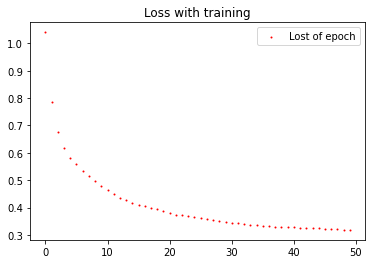

In [17]:
def plotLoss(epoches, loss_list):
    plt.scatter(range(epoches), loss_list, c='r', s=1, label='Lost of epoch')
    plt.legend(loc='upper right')
    plt.title('Loss with training')
    plt.show()

plotLoss(epoches, loss_list)